Madoria-EDA

My analysis is on the gross profit in the domestic vs foreign box office market and the production budget. My analysis utilizes the movie_gross, movie_budgets, and tmbd_movies charts:

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

After importing, pandas and matplotlib, I decided to get a peek of the data including a description of each of the table values.

In [88]:
df1= pd.read_csv('data/bom.movie_gross.csv')
df1.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [91]:
gross= df1[df1['studio'].notna() & df1['domestic_gross'].notna()]
gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [93]:
gross['foreign_gross']= gross['foreign_gross'].fillna(0)

<ipython-input-93-29bb5cd67e81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross['foreign_gross']= gross['foreign_gross'].fillna(0)


In [94]:
gross['foreign_gross'] = gross['foreign_gross'].str.replace(',', '').astype(float)

<ipython-input-94-75ad6d22bf88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross['foreign_gross'] = gross['foreign_gross'].str.replace(',', '').astype(float)


In [95]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


In [96]:
top_10_studios_domestic= gross.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False).head(10)
top_10_studios_domestic

studio
BV         1.841903e+10
Uni.       1.290239e+10
WB         1.216805e+10
Fox        1.094950e+10
Sony       8.459683e+09
Par.       7.685871e+09
LGF        4.118963e+09
WB (NL)    3.995700e+09
LG/S       2.078200e+09
P/DW       1.682900e+09
Name: domestic_gross, dtype: float64

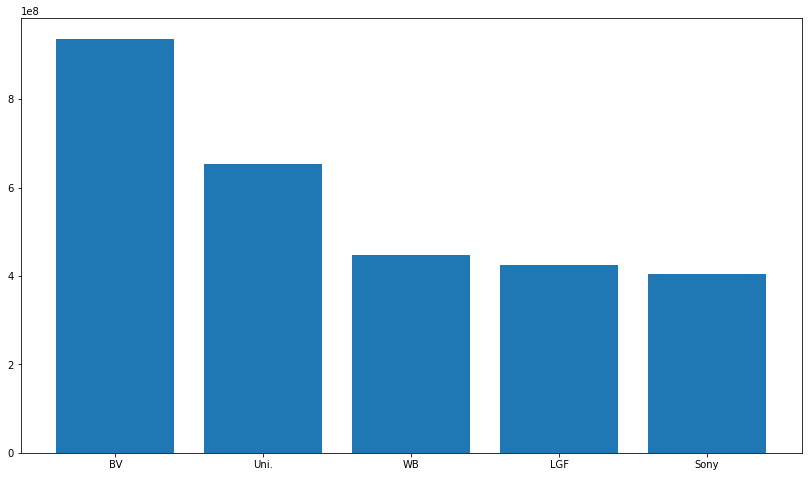

In [182]:
top_domestic = gross.sort_values('domestic_gross', ascending=False).iloc[:20]

fig, ax= plt.subplots(figsize=(14,8))

ax.bar(top_domestic['studio'], top_domestic['domestic_gross'])
ax.set_title='Top 5 Studios'
ax.set_xlabel= 'Studios'
ax.set_ylabel='Domestic Gross'

In [122]:
top_10_studios_foreign= gross.groupby('studio')['foreign_gross'].sum().sort_values(ascending=False).head(10)
top_10_studios_foreign

studio
BV         2.579385e+10
Fox        2.005587e+10
WB         1.866790e+10
Uni.       1.685477e+10
Sony       1.394524e+10
Par.       1.186338e+10
WB (NL)    6.339000e+09
LGF        4.475619e+09
P/DW       3.393600e+09
LG/S       3.353724e+09
Name: foreign_gross, dtype: float64

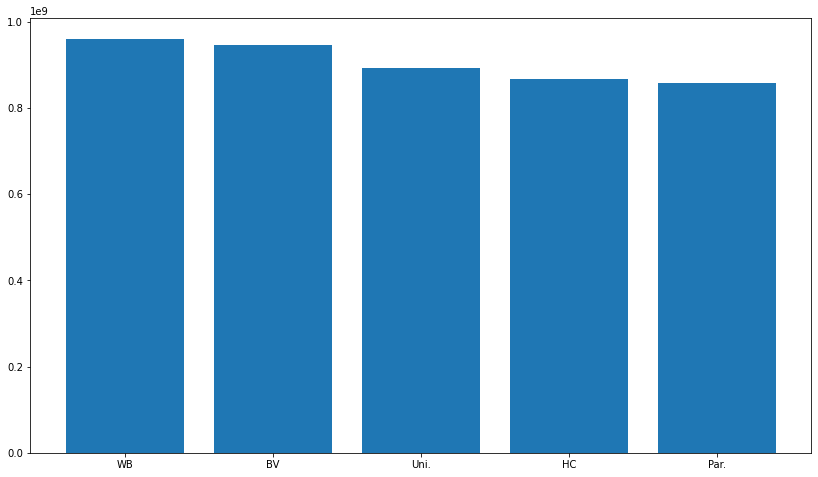

In [181]:
top_foreign = gross.sort_values('foreign_gross', ascending=False).iloc[:10]

fig, ax= plt.subplots(figsize=(14,8))

ax.bar(top_foreign['studio'], top_foreign['foreign_gross'])
ax.set_title= 'Top 5 Studios in Foreign Gross'
ax.set_xlabel= 'Studios'
ax.set_ylabel= 'Foreign Gross'

In [149]:
df2= pd.read_csv('data/tn.movie_budgets.csv')
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [150]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [151]:
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
df2[cols] = df2[cols].replace('[\$,]','', regex=True).astype(float)
df2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [199]:
df2['domestic_profit']= (df2['domestic_gross'] - df2['production_budget'])
df2['worldwide_profit']= (df2['worldwide_gross'] - df2['production_budget'])
df2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0,9.997217e+08
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,-7000.0,-7.000000e+03
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,42482.0,2.344950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3662.0,-3.662000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1400.0,-1.400000e+03


In [200]:
top_20_movies_worldwide= df2.nlargest(20, 'worldwide_gross')['movie'].reset_index()
top_20_movies_worldwide 

,index,movie
0,0,Avatar
1,42,Titanic
2,5,Star Wars Ep. VII: The Force Awakens
3,6,Avengers: Infinity War
4,33,Jurassic World
5,66,Furious 7
6,26,The Avengers
7,3,Avengers: Age of Ultron
8,41,Black Panther
9,260,Harry Potter and the Deathly Hallows: Part II


Text(0, 0.5, 'Worldwide Profit (in billions)')

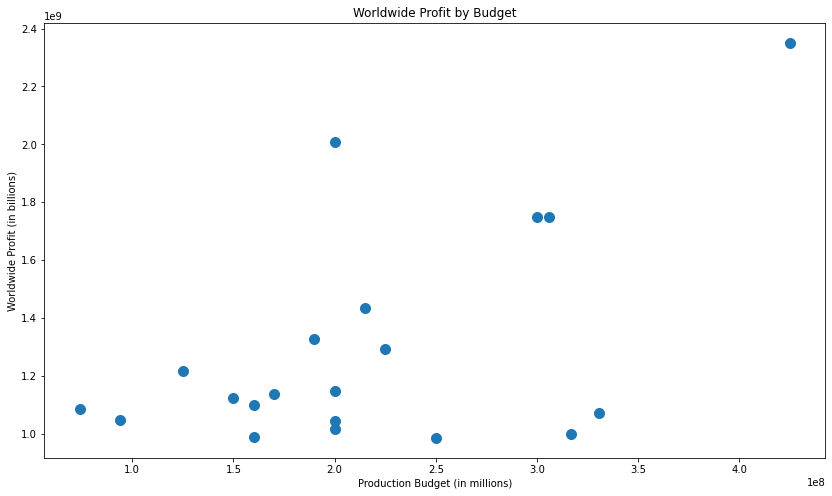

In [203]:
top_world_profit = df2.sort_values('worldwide_profit', ascending=False).iloc[:20]

fig, ax= plt.subplots(figsize=(14,8))

ax.scatter(top_world_profit['production_budget'], top_world_profit['worldwide_profit'], s=100)
ax.set_title("Worldwide Profit by Budget")
ax.set_xlabel("Production Budget (in millions)")
ax.set_ylabel("Worldwide Profit (in billions)")

In [174]:
top_10_movies_domestic= df2.nlargest(20, 'domestic_gross')['movie'].reset_index()
top_10_movies_domestic

,index,movie
0,5,Star Wars Ep. VII: The Force Awakens
1,0,Avatar
2,41,Black Panther
3,6,Avengers: Infinity War
4,42,Titanic
5,33,Jurassic World
6,26,The Avengers
7,4,Star Wars Ep. VIII: The Last Jedi
8,43,Incredibles 2
9,74,The Dark Knight


Text(0, 0.5, 'Domestic Profit (in 100 millions)')

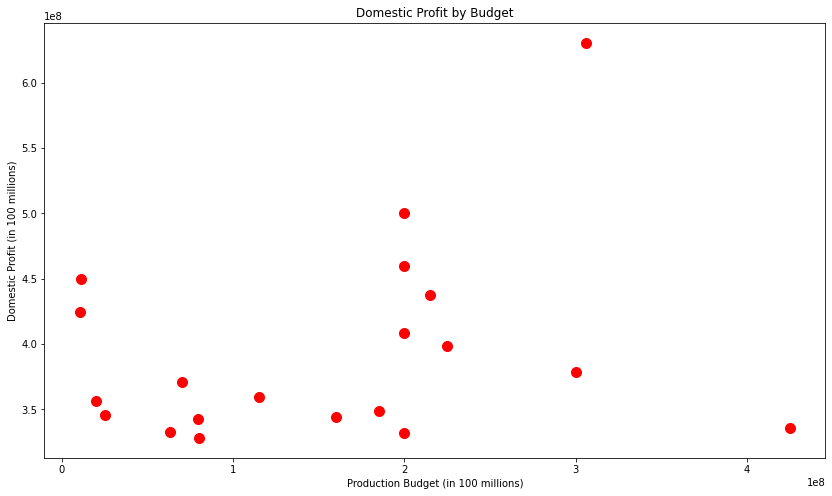

In [205]:
top_dom_profit = df2.sort_values('domestic_profit', ascending=False).iloc[:20]

fig, ax= plt.subplots(figsize=(14,8))

ax.scatter(top_dom_profit['production_budget'], top_dom_profit['domestic_profit'], c='r', s=100)
ax.set_title("Domestic Profit by Budget")
ax.set_xlabel("Production Budget (in 100 millions)")
ax.set_ylabel("Domestic Profit (in 100 millions)")

Now seeing if anything ties into df3.

In [15]:
df3= pd.read_csv('data/tmdb.movies.csv')
df3.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [17]:
df3.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [18]:
df3['vote_high_low']= ["High Votes" if x > 194 else "Low Votes" for x in df3['vote_count']]
df3.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,vote_high_low
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,High Votes
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,High Votes
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,High Votes
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,High Votes
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,High Votes


In [134]:
df3= df3[df3['vote_high_low'] == 'High Votes'] 
df3= df3[df3['vote_average'] > 7]
df3

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,vote_high_low
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,High Votes
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,High Votes
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,High Votes
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,High Votes
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,High Votes
...,...,...,...,...,...,...,...,...,...,...,...
24299,24299,[18],10238,sv,Viskningar och rop,8.239,1972-12-21,Cries and Whispers,8.0,233,High Votes
24330,24330,"[80, 18]",11656,sv,Jungfrukällan,7.926,1960-02-08,The Virgin Spring,8.0,219,High Votes
24341,24341,[18],392982,en,Marshall,7.879,2017-10-13,Marshall,7.3,257,High Votes
24462,24462,"[28, 16, 14, 12, 35, 878]",503314,ja,ドラゴンボール超スーパー ブロリー,6.868,2019-01-16,Dragon Ball Super: Broly,7.4,721,High Votes


In [187]:
most_popular= df3.nlargest(20, 'popularity')['genre_ids'].sort_values()
most_popular

23815    [10751, 16, 35, 14, 12]
23811               [12, 28, 14]
17382              [12, 28, 878]
23825                [18, 10402]
23817          [28, 12, 14, 878]
11022          [28, 12, 14, 878]
11020               [28, 12, 14]
23812      [28, 12, 16, 878, 35]
20621           [28, 12, 35, 14]
23819           [28, 12, 35, 14]
20622          [28, 12, 35, 878]
20618          [28, 12, 878, 18]
14169              [28, 12, 878]
20620              [28, 18, 878]
23823               [28, 35, 12]
11019                   [28, 53]
11021              [28, 878, 12]
5179               [878, 28, 12]
20617              [878, 28, 53]
23813              [878, 28, 53]
Name: genre_ids, dtype: object

In [196]:
most_popular_name= df3.nlargest(20, 'popularity')['title']
most_popular_name

23811                       Avengers: Infinity War
11019                                    John Wick
23812            Spider-Man: Into the Spider-Verse
11020    The Hobbit: The Battle of the Five Armies
5179                                  The Avengers
11021                      Guardians of the Galaxy
20617                            Blade Runner 2049
23813                            Blade Runner 2049
23815                    Ralph Breaks the Internet
20618                       Spider-Man: Homecoming
20620                                        Logan
14169                      Avengers: Age of Ultron
23817                                Black Panther
20621                               Thor: Ragnarok
23819                               Thor: Ragnarok
11022                   X-Men: Days of Future Past
20622               Guardians of the Galaxy Vol. 2
17382                   Captain America: Civil War
23823                                   Deadpool 2
23825                          